Poject capstone: Data Wrangling
Loan Defaulting data obtained from kaggle

## Imports

In [18]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'library'

## Load the loan defualt data

There are three different files that come with this data, the first dataset is of applicants that have yet to be approved. the second file is the description of the columns, some of the column names may be difficult to interperate so this is a key file thats needed in order to get a better understaning of our columns. the final file is the data for applications in the past which provide information as to why they did or did not get approved and other atributes about the applicants.


In [5]:
#loading all three files of the data set
application_data = pd.read_csv('application_data.csv') #applications with no outcome
colDescription = pd.read_csv('columns_description.csv') #description of the columns
previous_application = pd.read_csv('previous_application.csv') #prior applications and their info.

In [6]:
#checking the dimensions of data to see if its complete and checking the summary of the data
print('column description shape: ', np.shape(pd.DataFrame(colDescription)))
print(colDescription.info())
print('shape of "previous applications" data: ', np.shape(pd.DataFrame(previous_application)))
print(previous_application.info())
print('shape of "spplications" data: ', np.shape(pd.DataFrame(application_data)))
print(application_data.info())

column description shape:  (160, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB
None
shape of "previous applications" data:  (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null 

as we can see, the column description file has 160 rows and 5 columns (actually, 161 X 5 since python starts with 0), printing the description file itself will tell us exactly what the file contains. it should contain the description of the columns in both previous_application and application_data. 

## Explore the data

In [7]:
display(colDescription) #using 'display' as opposed to 'print' shows the data in a cleaner form

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


As we can see, the column description file does indeed tell us what the column names are for the other two files however, it would make more sence if we transpose the data in order to see all columns. we also have no need for the first column labeled as 'Unnamed: 0' so we can drop it before transposing the DF

In [8]:
colDescription.drop('Unnamed: 0', axis = 'columns', inplace = True)
colDescriptionT = colDescription.transpose()
display(colDescriptionT)

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Table,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,...,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv
Row,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
Description,ID of loan in our sample,Target variable (1 - client with payment diffi...,Identification if loan is cash or revolving,Gender of the client,Flag if the client owns a car,Flag if client owns a house or flat,Number of children the client has,Income of the client,Credit amount of the loan,Loan annuity,...,The industry of the seller,Term of previous credit at application of the ...,Grouped interest rate into small medium and hi...,Detailed product combination of the previous a...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Did the client requested insurance during the ...
Special,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,grouped,NaN,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,NaN


looking better, now we need to reset the intex to reflect the column names. Once the column names are renamed properly, we can drop the 'Row' row of data frame since its not needed anymore. 

In [9]:
columns_desc = colDescription['Row'] 
colDescriptionT.rename((columns_desc), axis = 1, inplace = True)
colDescriptionT.drop('Row', axis = 'rows', inplace = True)

In [10]:
display(colDescriptionT)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
Table,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,...,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv
Description,ID of loan in our sample,Target variable (1 - client with payment diffi...,Identification if loan is cash or revolving,Gender of the client,Flag if the client owns a car,Flag if client owns a house or flat,Number of children the client has,Income of the client,Credit amount of the loan,Loan annuity,...,The industry of the seller,Term of previous credit at application of the ...,Grouped interest rate into small medium and hi...,Detailed product combination of the previous a...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Did the client requested insurance during the ...
Special,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,grouped,NaN,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,NaN


the following cells print the last two files that come with this dataset. 
one file is called 'application_data' which contains atributes of current applicants while the second file called 'previous_application.csv' contains attributes of prior applicants and the outcome of thier loan i.e. did they get approved and did they default.

In [11]:
print('application_data DataFrame printed below')
display(application_data)
print('previous_applicaton DataFrame printed below')
display(previous_application)


application_data DataFrame printed below


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


previous_applicaton DataFrame printed below


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


Comparing both of these files, we see that 'application_data' does not have the outcome of the loan meaning, we do not know if the approved applicants defaulted on their loan(s) thus we will focus our attention on the file 'previous_application.csv'

for the sake of getting a better visual idea of what the column contains, the following cells create a new list with the name of the columns, and their description for the previous applications. I then created a temporary data frame that can be refered to if needed

In [12]:
one = []
for col in previous_application.columns:
    one.append(col)
two = []
for i in range(123, 160):
    two.append(colDescriptionT.iloc[1,i])

In [13]:
dfname = {'name':one, 'desc':two}
display(pd.DataFrame(dfname))

,name,desc
0,SK_ID_PREV,ID of loan in our sample
1,SK_ID_CURR,"Contract product type (Cash loan, consumer loa..."
2,NAME_CONTRACT_TYPE,Annuity of previous application
3,AMT_ANNUITY,For how much credit did client ask on the prev...
4,AMT_APPLICATION,Final credit amount on the previous applicatio...
5,AMT_CREDIT,Down payment on the previous application
6,AMT_DOWN_PAYMENT,Goods price of good that client asked for (if ...
7,AMT_GOODS_PRICE,On which day of the week did the client apply ...
8,WEEKDAY_APPR_PROCESS_START,Approximately at what day hour did the client ...
9,HOUR_APPR_PROCESS_START,Flag if it was last application for the previo...


In [14]:
PreviousApplicationT = previous_application.T #transpose 

we can see that there is a column which has the status of previous loans. below is a plot showing how many loans get approved, cancelec, refused or an unused offer. 

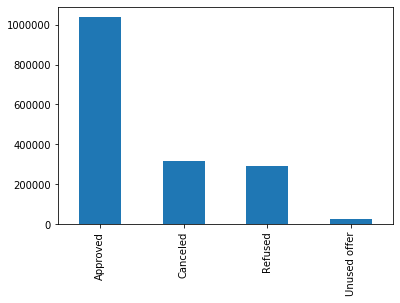

In [15]:
#16
PreviousApplicationT.loc['NAME_CONTRACT_STATUS'].value_counts().plot(kind = 'bar')

#of the rejected applications, why are they rejected? the following lists the code name reason of rejection. 

In [16]:
PreviousApplicationT.loc['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

## files

In [20]:
datapath = '../data'
save(colDescriptionT, 'colDescriptionT.csv', datapath)
datapath = '../data'
save_file(PreviousApplicationT, 'PreviousApplicationT.csv', datapath)

NameError: name 'save' is not defined